In [73]:
from pyramids import LaplacianPyramid
from torch.utils.data import DataLoader
import torchvision
import matplotlib.pyplot as plt
import numpy as np
import torch

In [63]:
pmd = LaplacianPyramid(6)

In [64]:
im = torchvision.io.read_image('lena.png')

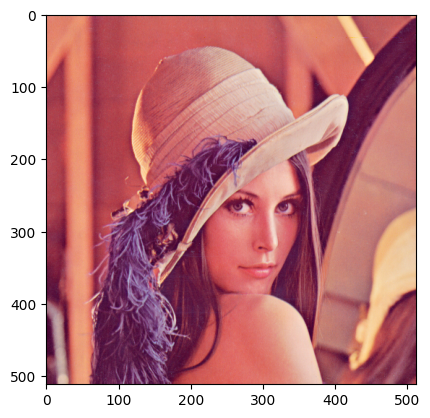

In [65]:
plt.imshow(im.permute(1,2,0))

In [66]:
pyr = pmd.pyramid(im.unsqueeze(0).float())

In [77]:
ma, mi = 0, 0
for i in pyr:
    if i.max() > ma:
        ma = i.max()
    if i.min() < mi:
        mi = i.min()

torch.Size([1, 3, 512, 512])
tensor(-97.6796) tensor(82.8165)
tensor(0.) tensor(1.)


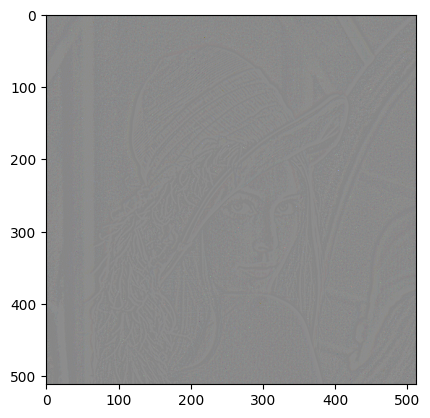

torch.Size([1, 3, 256, 256])
tensor(-23.7336) tensor(33.7802)
tensor(0.) tensor(1.)


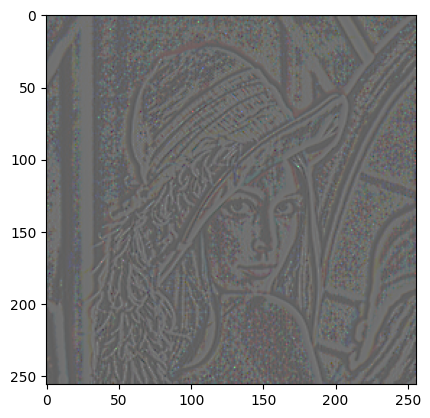

torch.Size([1, 3, 128, 128])
tensor(-48.8980) tensor(21.2190)
tensor(0.) tensor(1.)


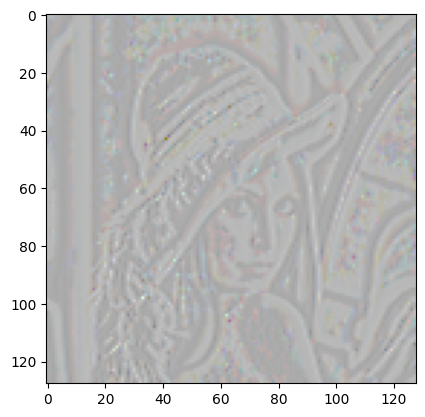

torch.Size([1, 3, 64, 64])
tensor(-101.6462) tensor(66.3409)
tensor(0.) tensor(1.)


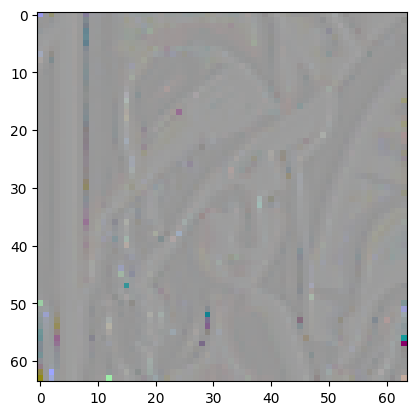

torch.Size([1, 3, 32, 32])
tensor(-592.7911) tensor(175.6691)
tensor(0.) tensor(1.)


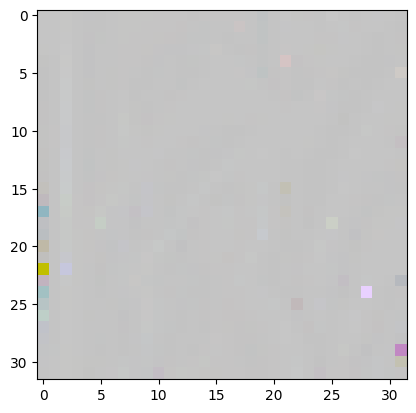

torch.Size([1, 3, 16, 16])
tensor(-57.5514) tensor(88.2497)
tensor(0.) tensor(1.)


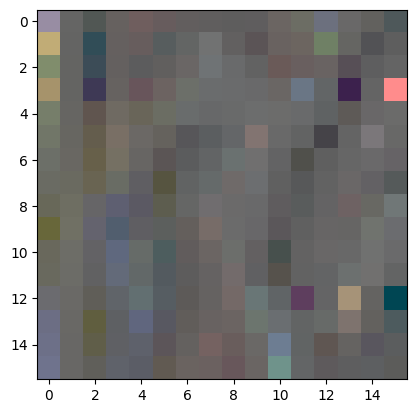

In [79]:
for i in range(len(pyr)):
    pi = pyr[i]
    print(pi.shape)
    print(pi.min(),pi.max())
    pi = (pi + abs(pi.min()))/(pi + abs(pi.min())).max()
    # pi = (pi + abs(mi))/(ma + abs(mi)).max()
    print(pi.min(),pi.max())
    plt.imshow(pi.squeeze().permute(1,2,0))
    plt.show()